In [314]:
from gazpacho import get, Soup

In [315]:
url = 'https://footystats.org/europe/uefa-champions-league/fixtures'
html = get(url)
soup = Soup(html)

In [316]:
htmlClubs = soup.find('td', {'class': 'leagueTableTeamName'})

clubs = []
for club in htmlClubs:
    club = club.text
    clubs.append(club)


print(clubs)

['Manchester City', 'Real Madrid', 'Galatasaray', 'PSV', 'København', 'Bayern München', 'Atlético Madrid', 'Raków Częstochowa', 'Arsenal', 'FC Barcelona', 'Maccabi Haifa', 'Sporting Braga', 'Porto', 'Borussia Dortmund', 'Inter Milan', 'PSG', 'RB Leipzig', 'Lazio', 'Breidablik', 'Real Sociedad', 'Napoli', 'Olimpija', 'KÍ', 'Shakhtar Donetsk', 'Royal Antwerp FC', 'Häcken', 'Slovan Bratislava', 'AC Milan', 'Young Boys', 'Lens', 'Dinamo Zagreb', 'Qarabağ', 'HJK', 'Panathinaikos', 'Aris', 'Sheriff', 'Molde', 'Feyenoord', 'Žalgiris', 'Newcastle United', 'Rangers', 'Ludogorets', 'AEK Athens', 'Zrinjski', 'Manchester United', 'Salzburg', 'Benfica', 'BATE', 'Astana', 'Celtic', 'Olympique Marseille', 'Banants', 'Servette', 'SSC Farul', 'Ballkani', 'Budućnost', 'KRC Genk', 'Sparta Praha', 'Union Berlin', 'Sevilla FC', 'Struga', 'Dinamo Tbilisi', 'Larne', 'Partizani Tirana', 'Swift Hesperange', 'Dnipro-1', 'Ferencváros', 'Red Star Belgrade', 'Shamrock Rovers', 'Valmiera / BSS', "Atlètic Club d'Esc

In [317]:
import sqlite3

conn = sqlite3.connect('C:/Users/Silas/source/repos/Python/Database/championsLeague.db')
cursor = conn.cursor()

#CreateTableClubs = '''CREATE TABLE clubs(ID INTEGER PRIMARY KEY AUTOINCREMENT, club TEXT)'''

#cursor.execute(CreateTableClubs)

In [318]:
cursor.execute("DELETE FROM clubs")
conn.commit()

for club in clubs:
    cursor.execute("INSERT INTO clubs (club) VALUES (?)", (club,))
    conn.commit()

cursor.execute("SELECT * FROM clubs")
print(cursor.fetchall())

[(2419, 'Manchester City'), (2420, 'Real Madrid'), (2421, 'Galatasaray'), (2422, 'PSV'), (2423, 'København'), (2424, 'Bayern München'), (2425, 'Atlético Madrid'), (2426, 'Raków Częstochowa'), (2427, 'Arsenal'), (2428, 'FC Barcelona'), (2429, 'Maccabi Haifa'), (2430, 'Sporting Braga'), (2431, 'Porto'), (2432, 'Borussia Dortmund'), (2433, 'Inter Milan'), (2434, 'PSG'), (2435, 'RB Leipzig'), (2436, 'Lazio'), (2437, 'Breidablik'), (2438, 'Real Sociedad'), (2439, 'Napoli'), (2440, 'Olimpija'), (2441, 'KÍ'), (2442, 'Shakhtar Donetsk'), (2443, 'Royal Antwerp FC'), (2444, 'Häcken'), (2445, 'Slovan Bratislava'), (2446, 'AC Milan'), (2447, 'Young Boys'), (2448, 'Lens'), (2449, 'Dinamo Zagreb'), (2450, 'Qarabağ'), (2451, 'HJK'), (2452, 'Panathinaikos'), (2453, 'Aris'), (2454, 'Sheriff'), (2455, 'Molde'), (2456, 'Feyenoord'), (2457, 'Žalgiris'), (2458, 'Newcastle United'), (2459, 'Rangers'), (2460, 'Ludogorets'), (2461, 'AEK Athens'), (2462, 'Zrinjski'), (2463, 'Manchester United'), (2464, 'Salzbu

In [319]:
htmlMatches = soup.find('li', {'class': 'match-info row cf fl rfnone'})

In [320]:
def findUnplayedmatches(matches):
    unplayedMatches = []
    for match in htmlMatches:
        matchInfo = match.find('span')
        if matchInfo[1].text == 'Stats':
            addStats = matchInfo[1].text
            unplayedMatches.append(addStats)
    return unplayedMatches

In [321]:
matches = []
unPlayedMatches = 0

unPlayedMatches = len(findUnplayedmatches(htmlMatches))

for match in htmlMatches[unPlayedMatches:]:
    matchInfo = match.find('span')
    homeTeam = matchInfo[0].text
    result = matchInfo[1].text
    awayTeam = matchInfo[3].text
    teamForm = match.find('div' , {'class': 'form-box'})
    homeTeamForm = teamForm[0].text
    awayTeamForm = teamForm[1].text

    matches.append((homeTeamForm, homeTeam, result, awayTeam, awayTeamForm))

print(matches)


#kast det ned i databasen







[('1.88', 'Borussia Dortmund', '2 - 0', 'PSV', '1.67'), ('2.13', 'Atlético Madrid', '2 - 1', 'Inter Milan', '1.88'), ('2.00', 'FC Barcelona', '3 - 1', 'Napoli', '1.38'), ('2.00', 'Arsenal', '1 - 0', 'Porto', '1.88'), ('3.00', 'Manchester City', '3 - 1', 'København', '1.43'), ('2.75', 'Real Madrid', '1 - 1', 'RB Leipzig', '1.63'), ('2.38', 'Bayern München', '3 - 0', 'Lazio', '1.63'), ('1.50', 'Real Sociedad', '1 - 2', 'PSG', '1.75'), ('1.38', 'Napoli', '1 - 1', 'FC Barcelona', '2.00'), ('1.88', 'Porto', '1 - 0', 'Arsenal', '2.00'), ('1.67', 'PSV', '1 - 1', 'Borussia Dortmund', '1.88'), ('1.88', 'Inter Milan', '1 - 0', 'Atlético Madrid', '2.13'), ('1.63', 'Lazio', '1 - 0', 'Bayern München', '2.38'), ('1.75', 'PSG', '2 - 0', 'Real Sociedad', '1.50'), ('1.63', 'RB Leipzig', '0 - 1', 'Real Madrid', '2.75'), ('1.43', 'København', '1 - 3', 'Manchester City', '3.00'), ('1.88', 'Borussia Dortmund', '1 - 1', 'PSG', '1.75'), ('2.13', 'Atlético Madrid', '2 - 0', 'Lazio', '1.63'), ('0.67', 'Celtic'

In [322]:
htmlMatchesOdds = soup.find('li', {'class': 'match-stats fl'})

matchesOdds = []

for odds in htmlMatchesOdds[unPlayedMatches:]:
    oddsInfo = odds.find('span')
    homeWin = oddsInfo[0].text
    draw = oddsInfo[1].text
    awayWin = oddsInfo[2].text
    matchesOdds.append((homeWin, draw, awayWin))

print(matchesOdds)

[('2.20', '3.65', '3.10'), ('2.75', '3.15', '2.70'), ('1.88', '3.60', '4.00'), ('1.22', '6.50', '11.00'), ('1.15', '8.30', '17.00'), ('1.65', '4.25', '4.75'), ('1.22', '5.50', '10.00'), ('2.38', '3.30', '2.75'), ('2.50', '3.50', '2.65'), ('4.20', '3.70', '1.85'), ('1.96', '3.45', '3.05'), ('1.64', '3.35', '4.55'), ('5.00', '4.00', '1.67'), ('1.60', '4.20', '5.25'), ('3.14', '3.56', '2.17'), ('8.22', '5.37', '1.31'), ('3.75', '3.90', '1.83'), ('1.55', '4.00', '5.50'), ('2.95', '3.75', '2.15'), ('6.25', '4.75', '1.44'), ('1.75', '3.85', '4.20'), ('1.45', '4.50', '6.00'), ('9.00', '6.25', '1.25'), ('1.33', '5.50', '7.50'), ('2.95', '3.55', '2.30'), ('1.80', '4.00', '4.00'), ('4.50', '3.95', '1.73'), ('1.40', '5.00', '7.00'), ('2.63', '3.70', '2.45'), ('2.50', '3.60', '2.65'), ('2.25', '3.25', '3.25'), ('3.50', '3.75', '1.95'), ('1.50', '4.33', '5.80'), ('2.50', '3.50', '2.60'), ('2.15', '3.60', '3.00'), ('1.67', '4.00', '4.40'), ('1.25', '5.80', '9.50'), ('1.20', '6.50', '11.00'), ('2.45'

In [323]:
foreachMatch = []

for match in matches:
    foreachMatch.append(match + matchesOdds[matches.index(match)])

print(foreachMatch)

[('1.88', 'Borussia Dortmund', '2 - 0', 'PSV', '1.67', '2.20', '3.65', '3.10'), ('2.13', 'Atlético Madrid', '2 - 1', 'Inter Milan', '1.88', '2.75', '3.15', '2.70'), ('2.00', 'FC Barcelona', '3 - 1', 'Napoli', '1.38', '1.88', '3.60', '4.00'), ('2.00', 'Arsenal', '1 - 0', 'Porto', '1.88', '1.22', '6.50', '11.00'), ('3.00', 'Manchester City', '3 - 1', 'København', '1.43', '1.15', '8.30', '17.00'), ('2.75', 'Real Madrid', '1 - 1', 'RB Leipzig', '1.63', '1.65', '4.25', '4.75'), ('2.38', 'Bayern München', '3 - 0', 'Lazio', '1.63', '1.22', '5.50', '10.00'), ('1.50', 'Real Sociedad', '1 - 2', 'PSG', '1.75', '2.38', '3.30', '2.75'), ('1.38', 'Napoli', '1 - 1', 'FC Barcelona', '2.00', '2.50', '3.50', '2.65'), ('1.88', 'Porto', '1 - 0', 'Arsenal', '2.00', '4.20', '3.70', '1.85'), ('1.67', 'PSV', '1 - 1', 'Borussia Dortmund', '1.88', '1.96', '3.45', '3.05'), ('1.88', 'Inter Milan', '1 - 0', 'Atlético Madrid', '2.13', '1.64', '3.35', '4.55'), ('1.63', 'Lazio', '1 - 0', 'Bayern München', '2.38', '5.

In [324]:
resultList = []

for result in foreachMatch:
    newresult = result[2].split(' - ')
    if newresult[0] == newresult[1]:
        newresult = 'Draw'
    elif newresult[0] > newresult[1]:
        newresult = 'homeWin'
    elif newresult[0] < newresult[1]:
        newresult = 'awayWin'
    resultList.append(newresult)

print(resultList)

['homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'Draw', 'homeWin', 'awayWin', 'Draw', 'homeWin', 'Draw', 'homeWin', 'homeWin', 'homeWin', 'awayWin', 'awayWin', 'Draw', 'homeWin', 'homeWin', 'homeWin', 'awayWin', 'homeWin', 'awayWin', 'homeWin', 'awayWin', 'Draw', 'awayWin', 'homeWin', 'homeWin', 'awayWin', 'homeWin', 'Draw', 'Draw', 'Draw', 'Draw', 'homeWin', 'homeWin', 'Draw', 'awayWin', 'Draw', 'Draw', 'awayWin', 'awayWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'awayWin', 'homeWin', 'Draw', 'homeWin', 'awayWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'homeWin', 'awayWin', 'Draw', 'homeWin', 'homeWin', 'awayWin', 'awayWin', 'homeWin', 'homeWin', 'awayWin', 'awayWin', 'awayWin', 'awayWin', 'Draw', 'homeWin', 'homeWin', 'awayWin', 'homeWin', 'awayWin', 'Draw', 'awayWin', 'awayWin', 'Draw', 'awayWin', 'homeWin', 'homeWin', 'awayWin', 'Draw', 'homeWin', 'awayWin', 'awayWin', 'awayWin', 'awayWin

In [325]:
formTeamOddsResult = []

for match in foreachMatch:
    formTeamOddsResult.append(match + (resultList[foreachMatch.index(match)],))

print(formTeamOddsResult)

[('1.88', 'Borussia Dortmund', '2 - 0', 'PSV', '1.67', '2.20', '3.65', '3.10', 'homeWin'), ('2.13', 'Atlético Madrid', '2 - 1', 'Inter Milan', '1.88', '2.75', '3.15', '2.70', 'homeWin'), ('2.00', 'FC Barcelona', '3 - 1', 'Napoli', '1.38', '1.88', '3.60', '4.00', 'homeWin'), ('2.00', 'Arsenal', '1 - 0', 'Porto', '1.88', '1.22', '6.50', '11.00', 'homeWin'), ('3.00', 'Manchester City', '3 - 1', 'København', '1.43', '1.15', '8.30', '17.00', 'homeWin'), ('2.75', 'Real Madrid', '1 - 1', 'RB Leipzig', '1.63', '1.65', '4.25', '4.75', 'Draw'), ('2.38', 'Bayern München', '3 - 0', 'Lazio', '1.63', '1.22', '5.50', '10.00', 'homeWin'), ('1.50', 'Real Sociedad', '1 - 2', 'PSG', '1.75', '2.38', '3.30', '2.75', 'awayWin'), ('1.38', 'Napoli', '1 - 1', 'FC Barcelona', '2.00', '2.50', '3.50', '2.65', 'Draw'), ('1.88', 'Porto', '1 - 0', 'Arsenal', '2.00', '4.20', '3.70', '1.85', 'homeWin'), ('1.67', 'PSV', '1 - 1', 'Borussia Dortmund', '1.88', '1.96', '3.45', '3.05', 'Draw'), ('1.88', 'Inter Milan', '1 - 

In [326]:
import matplotlib.pyplot as plt

In [327]:
profit = []

for data in formTeamOddsResult[:len(formTeamOddsResult)-4]:
    if data[8] == 'homeWin' and float(data[0]) > float(data[4]):
        profit.append(float(data[5])-1)
    elif data[8] == 'awayWin' and float(data[4]) > float(data[0]):
        profit.append(float(data[7])-1)
    elif data[8] == 'Draw' and float(data[0]) == float(data[4]):
        profit.append(float(data[6])-1)
    else:
        profit.append(-1)





In [328]:
import math

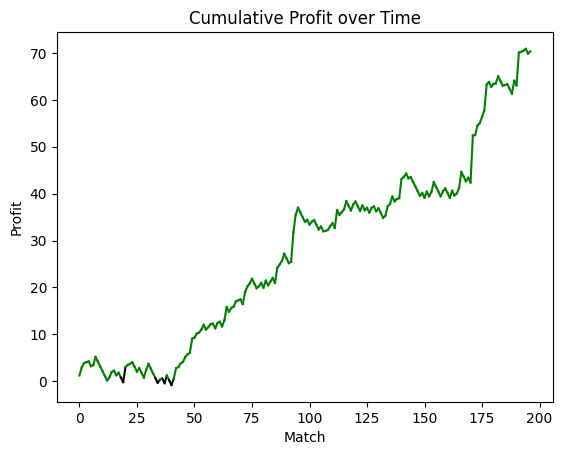

In [329]:
BestForm_profit = [math.fsum(profit[:i+1]) for i in range(len(profit))]

for i in range(len(BestForm_profit) - 1):
    if BestForm_profit[i] >= 0 and BestForm_profit[i+1] >= 0:
        plt.plot([i, i+1], [BestForm_profit[i], BestForm_profit[i+1]], color='green')
    elif BestForm_profit[i] < 0 and BestForm_profit[i+1] < 0:
        plt.plot([i, i+1], [BestForm_profit[i], BestForm_profit[i+1]], color='red')
    else:
        plt.plot([i, i+1], [BestForm_profit[i], BestForm_profit[i+1]], color='black')

plt.xlabel('Match')
plt.ylabel('Profit')
plt.title('Cumulative Profit over Time')
plt.show()


In [330]:
profitUnderdog = []

for data in formTeamOddsResult[:len(formTeamOddsResult)-4]:
    if data[8] == 'homeWin' and float(data[0]) < float(data[4]):
        profitUnderdog.append(float(data[5])-1)
    elif data[8] == 'awayWin' and float(data[4]) < float(data[0]):
        profitUnderdog.append(float(data[7])-1)
    elif data[8] == 'Draw' and float(data[0]) == float(data[4]):
        profitUnderdog.append(float(data[6])-1)
    else:
        profitUnderdog.append(-1)



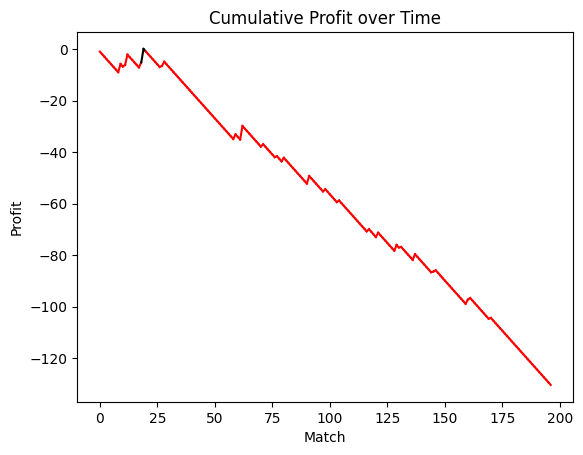

In [331]:
Underdog_profit = [math.fsum(profitUnderdog[:i+1]) for i in range(len(profitUnderdog))]

for i in range(len(Underdog_profit) - 1):
    if Underdog_profit[i] >= 0 and Underdog_profit[i+1] >= 0:
        plt.plot([i, i+1], [Underdog_profit[i], Underdog_profit[i+1]], color='green')
    elif Underdog_profit[i] < 0 and Underdog_profit[i+1] < 0:
        plt.plot([i, i+1], [Underdog_profit[i], Underdog_profit[i+1]], color='red')
    else:
        plt.plot([i, i+1], [Underdog_profit[i], Underdog_profit[i+1]], color='black')

plt.xlabel('Match')
plt.ylabel('Profit')
plt.title('Cumulative Profit over Time')
plt.show()

In [332]:
profitDraw = []

for data in formTeamOddsResult[:len(formTeamOddsResult)-4]:
    if data[8] == 'homeWin':
        profitDraw.append(-1)
    elif data[8] == 'awayWin':
        profitDraw.append(-1)
    elif data[8] == 'Draw':
        profitDraw.append(float(data[6])-1)
    else:
        profitDraw.append(-1)

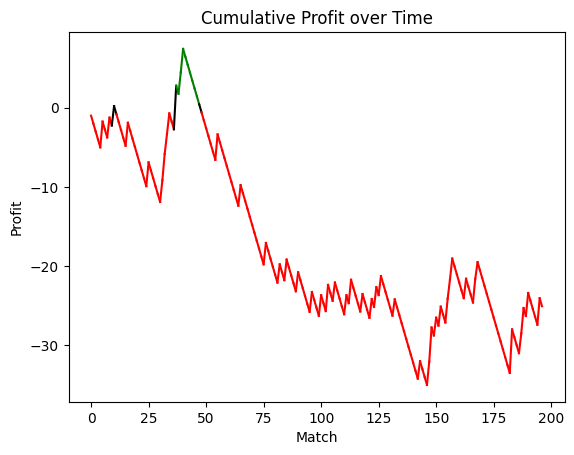

In [333]:
Draw_profit = ([math.fsum(profitDraw[:i+1]) for i in range(len(profitDraw))])

for i in range(len(Draw_profit) - 1):
    if Draw_profit[i] >= 0 and Draw_profit[i+1] >= 0:
        plt.plot([i, i+1], [Draw_profit[i], Draw_profit[i+1]], color='green')
    elif Draw_profit[i] < 0 and Draw_profit[i+1] < 0:
        plt.plot([i, i+1], [Draw_profit[i], Draw_profit[i+1]], color='red')
    else:
        plt.plot([i, i+1], [Draw_profit[i], Draw_profit[i+1]], color='black')

plt.xlabel('Match')
plt.ylabel('Profit')
plt.title('Cumulative Profit over Time')
plt.show()